<a href="https://colab.research.google.com/github/rareshnz/Licenta_Ciuperci/blob/main/CNN_Ciuperci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import Input


In [ ]:
dataset_path = "/content/drive/MyDrive/Mushrooms"
categories = ["Agaricus", "Amanita", "Boletus", "Cortinarius", "Entoloma", "Exidia", "Hygrocybe", "Inocybe", "Lactarius", "Pluteus", "Russula", "Suillus"]

images = []
labels = []

In [ ]:
for i, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    
    for img_path in os.listdir(category_path):
        img = cv2.imread(os.path.join(category_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        images.append(img)
        labels.append(i)

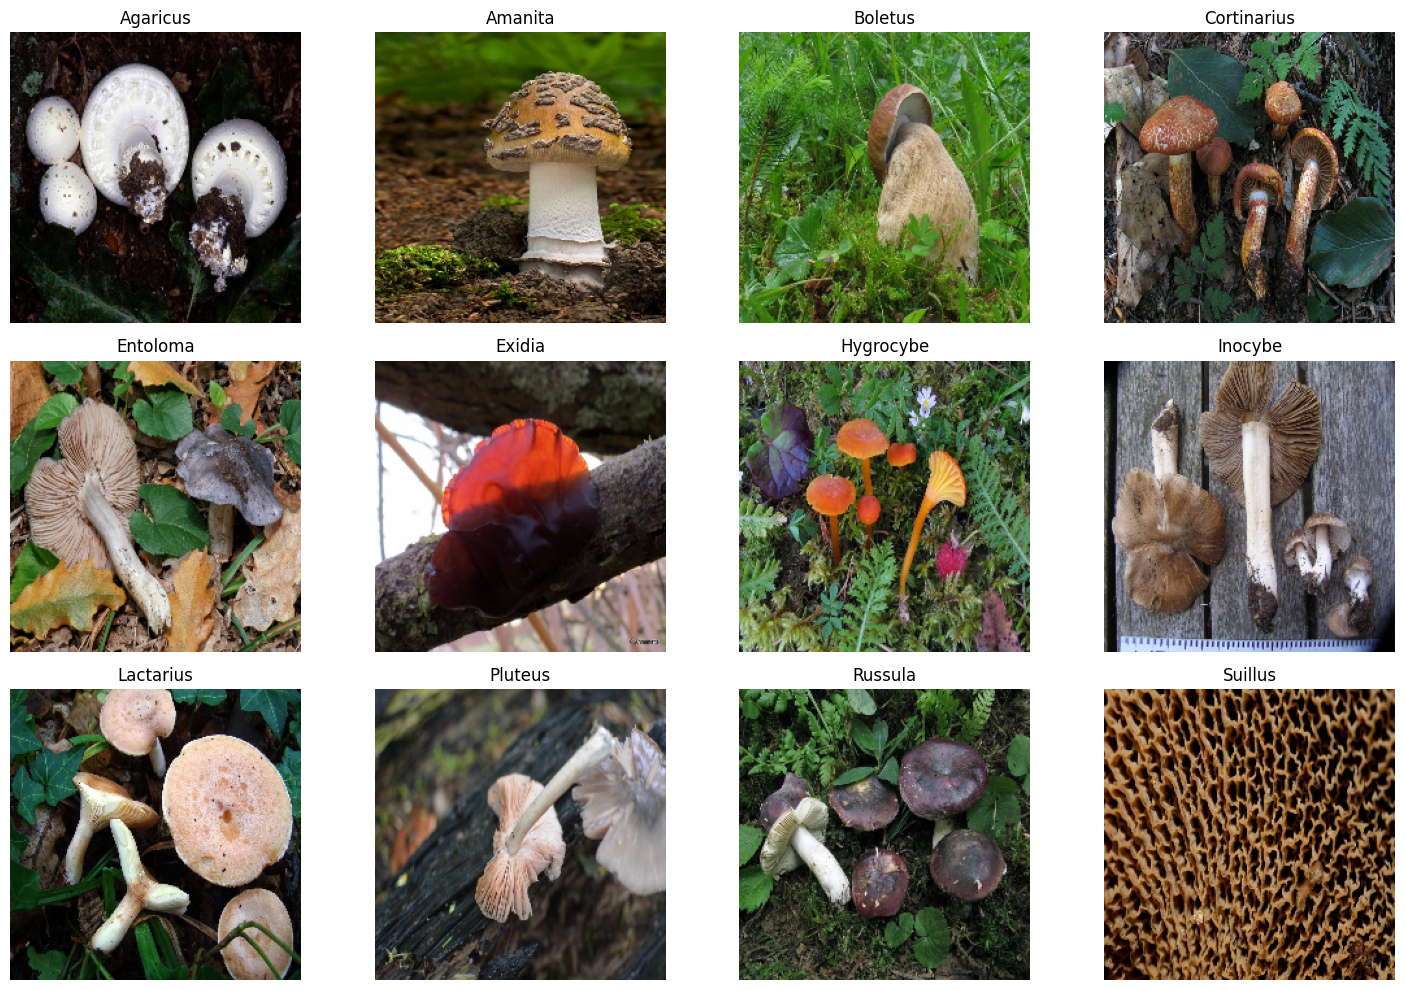

In [ ]:
def plot_mushroom_examples(images, categories):
    rows = 3
    cols = 4
    fig, axs = plt.subplots(rows, cols, figsize=(15, 10))

    representative_images = []
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        img_path = os.listdir(category_path)[0]
        img = cv2.imread(os.path.join(category_path, img_path))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        representative_images.append(img)

    for i, ax in enumerate(axs.flat):
        ax.imshow(representative_images[i])
        ax.set_title(categories[i])
        ax.axis("off")

    plt.tight_layout()
    plt.show()

plot_mushroom_examples(images, categories)

In [ ]:
X = np.array(images, dtype=np.float32) / 255.0
y = np.array(labels, dtype=np.int64)


Am normalizat pixelii

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

datagen.fit(X_train)

In [ ]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dense(len(categories), activation='softmax')
])
model.compile(optimizer=Adam(), loss=SparseCategoricalCrossentropy(from_logits=False), metrics=['accuracy'])
checkpoint = ModelCheckpoint("model.h5", save_best_only=True, monitor='val_loss', mode='min')
history=model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
239/239 [==============================] - 84s 301ms/step - loss: 2.3511 - accuracy: 0.1757 - val_loss: 2.2260 - val_accuracy: 0.2077
Epoch 2/100
239/239 [==============================] - 71s 299ms/step - loss: 2.1654 - accuracy: 0.2495 - val_loss: 2.1300 - val_accuracy: 0.2344
Epoch 3/100
239/239 [==============================] - 71s 298ms/step - loss: 2.0754 - accuracy: 0.2768 - val_loss: 2.0550 - val_accuracy: 0.2937
Epoch 4/100
239/239 [==============================] - 72s 301ms/step - loss: 2.0140 - accuracy: 0.3002 - val_loss: 2.0271 - val_accuracy: 0.3010
Epoch 5/100
239/239 [==============================] - 71s 298ms/step - loss: 1.9435 - accuracy: 0.3312 - val_loss: 2.0206 - val_accuracy: 0.3036
Epoch 6/100
239/239 [==============================] - 72s 301ms/step - loss: 1.9085 - accuracy: 0.3417 - val_loss: 1.9574 - val_accuracy: 0.3335
Epoch 7/100
239/239 [==============================] - 72s 303ms/step - loss: 1.8780 - accuracy: 0.3562 - val_loss: 1.8227 -

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 52, 52, 128)       73856     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 26, 26, 128)     

In [ ]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()



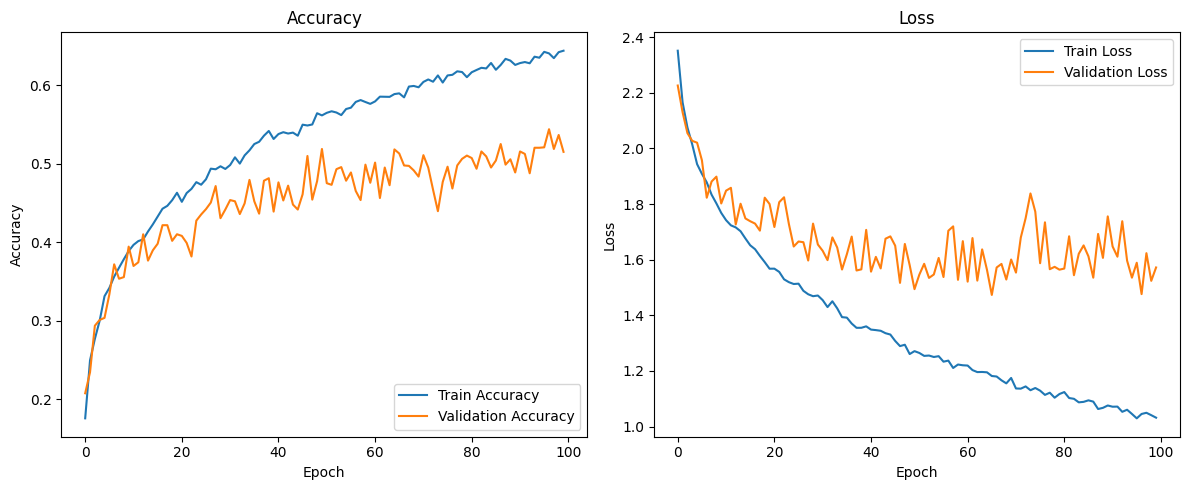

In [ ]:
plot_training_history(history)

60/60 [==============================] - 1s 7ms/step


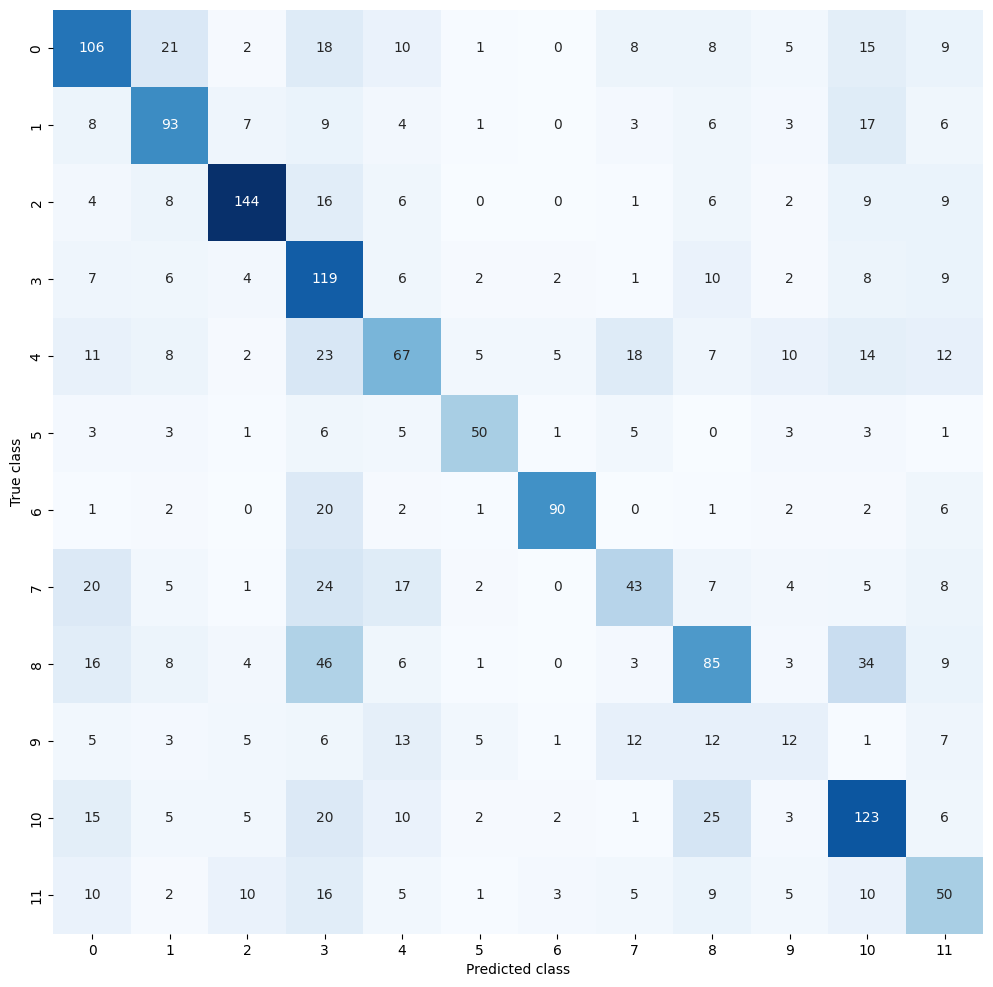

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_val, y_val):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

plot_confusion_matrix(model, X_val, y_val)

60/60 [==============================] - 0s 7ms/step


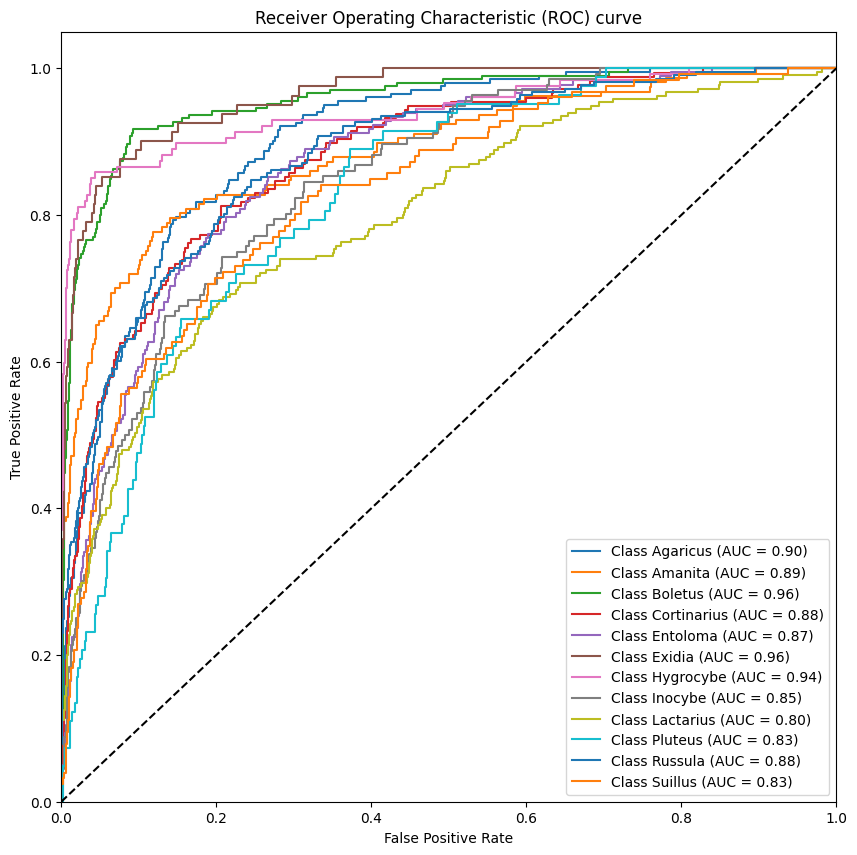

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_and_auc(model, X_val, y_val, categories):
    n_classes = len(categories)
    
    y_val_binarized = label_binarize(y_val, classes=np.arange(n_classes))
    y_pred = model.predict(X_val)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_val_binarized[:, i], y_pred[:, i])

    # Plot ROC curve
    plt.figure(figsize=(10, 10))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {categories[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_and_auc(model, X_val, y_val, categories)

In [ ]:
from sklearn.metrics import classification_report


def print_classification_report(model, X_val, y_val, categories):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    report = classification_report(y_val, y_pred, target_names=categories)
    print(report)

print_classification_report(model, X_val, y_val, categories)

60/60 [==============================] - 0s 7ms/step
              precision    recall  f1-score   support

    Agaricus       0.51      0.52      0.52       203
     Amanita       0.57      0.59      0.58       157
     Boletus       0.78      0.70      0.74       205
 Cortinarius       0.37      0.68      0.48       176
    Entoloma       0.44      0.37      0.40       182
      Exidia       0.70      0.62      0.66        81
   Hygrocybe       0.87      0.71      0.78       127
     Inocybe       0.43      0.32      0.36       136
   Lactarius       0.48      0.40      0.43       215
     Pluteus       0.22      0.15      0.18        82
     Russula       0.51      0.57      0.54       217
     Suillus       0.38      0.40      0.39       126

    accuracy                           0.51      1907
   macro avg       0.52      0.50      0.50      1907
weighted avg       0.53      0.51      0.51      1907



In [ ]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
kappa = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa:", kappa)

60/60 [==============================] - 0s 8ms/step
Cohen's Kappa: 0.46595926458763237


In [ ]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
false_positive_rate = cm.sum(axis=0) / cm.sum()
false_negative_rate = cm.sum(axis=1) / cm.sum()
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

60/60 [==============================] - 0s 7ms/step
False Positive Rate: [0.10802307 0.08599895 0.09701101 0.16937598 0.07918196 0.03723125
 0.05453592 0.05243838 0.09229156 0.02831673 0.12637651 0.06921867]
False Negative Rate: [0.10644992 0.08232826 0.10749869 0.09229156 0.09543786 0.04247509
 0.06659675 0.0713162  0.11274253 0.04299948 0.1137913  0.06607236]


In [ ]:
from keras.models import Model

base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))


for layer in base_model.layers[:-30]:
    layer.trainable = False
for layer in base_model.layers[-30:]:
    layer.trainable = True


x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(len(categories), activation='softmax')(x)


resnet_model = Model(inputs=base_model.input, outputs=predictions)


resnet_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5), loss='sparse_categorical_crossentropy', metrics=['accuracy'])


datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')


resnet_history = resnet_model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
148/239 [=================>............] - ETA: 27s - loss: 2.5203 - accuracy: 0.1018

KeyboardInterrupt: ignored

In [ ]:
plot_training_history(resnet_history)